<a href="https://colab.research.google.com/github/mukeshshah08/Stock-Market-Prediction-using-LSTM/blob/main/StockMarketPredictionUsingLSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q yfinance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import yfinance as yf
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up start and end times
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Fetch data and store in globals
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# Create DataFrame list and add company names
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, name in zip(company_list, company_name):
    company["company_name"] = name

# Combine all into one DataFrame
df = pd.concat(company_list, axis=0)
df.index.name = 'Date'
df.sort_index(inplace=True)

# Show tail
df.tail(10)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-14,202.520004,212.940002,201.160004,211.440002,101352900.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-14,NaN,NaN,NaN,NaN,NaN,GOOGLE,161.470001,164.029999,159.919998,162.309998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-15,NaN,NaN,NaN,NaN,NaN,MICROSOFT,NaN,NaN,NaN,NaN,...,385.730011,391.890015,384.160004,388.510010,17199900.0,NaN,NaN,NaN,NaN,NaN
2025-04-15,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,179.589996,182.350006,177.929993,181.410004,43642000.0
2025-04-15,NaN,NaN,NaN,NaN,NaN,GOOGLE,158.679993,162.050003,157.645004,161.570007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-15,202.139999,203.509995,199.800003,201.860001,51343900.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-16,NaN,NaN,NaN,NaN,NaN,GOOGLE,155.500000,158.179993,153.910004,155.470001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-16,194.270004,200.699997,192.369995,198.360001,59658900.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Summary Stats
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,220.125882,222.378673,217.588726,219.809087,5.686363e+07
std,20.664528,20.431272,20.642698,20.692681,3.304659e+07
min,164.224548,165.617963,163.308874,164.572928,2.323470e+07
25%,213.036423,215.283116,210.281114,212.894485,3.985705e+07
50%,224.256287,226.331875,222.515348,224.436039,4.813710e+07
75%,232.753716,234.517946,229.477700,232.697865,6.153960e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-04-17 to 2025-04-16
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     251 non-null    float64
 1   (High, AAPL)      251 non-null    float64
 2   (Low, AAPL)       251 non-null    float64
 3   (Open, AAPL)      251 non-null    float64
 4   (Volume, AAPL)    251 non-null    int64  
 5   (company_name, )  251 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


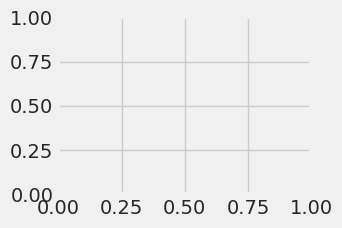

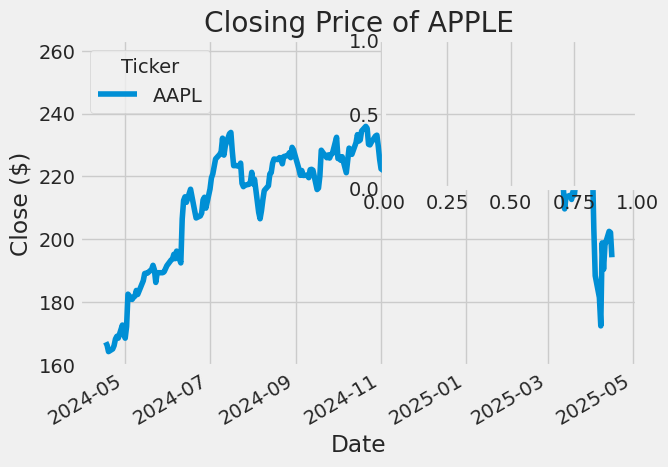

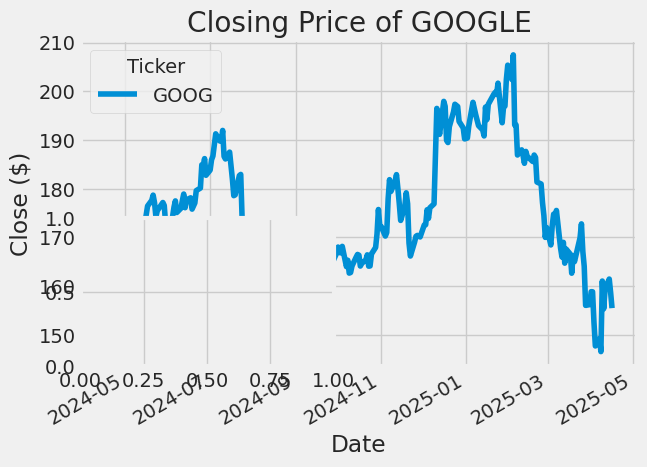

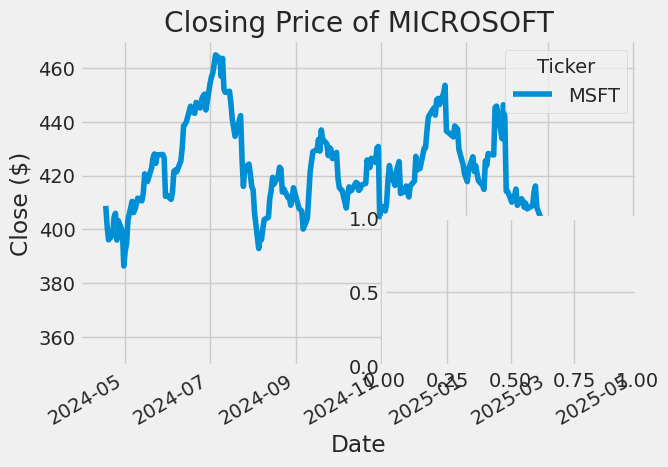

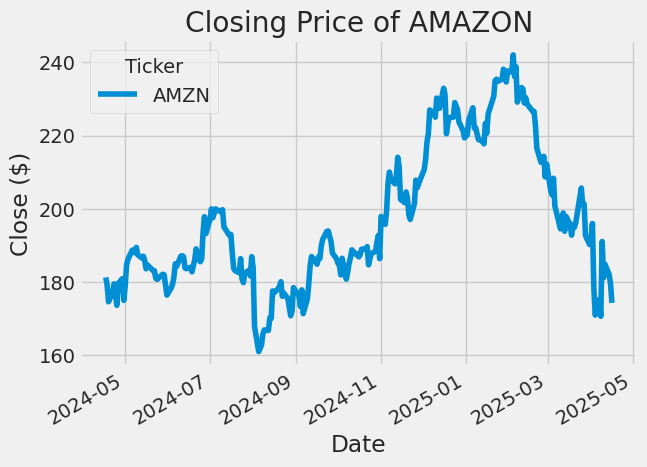

In [5]:
for i, (company, name) in enumerate(zip(company_list, company_name), 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close ($)')
    plt.title(f"Closing Price of {name}")
    plt.grid(True)


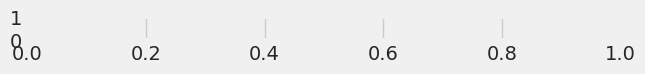

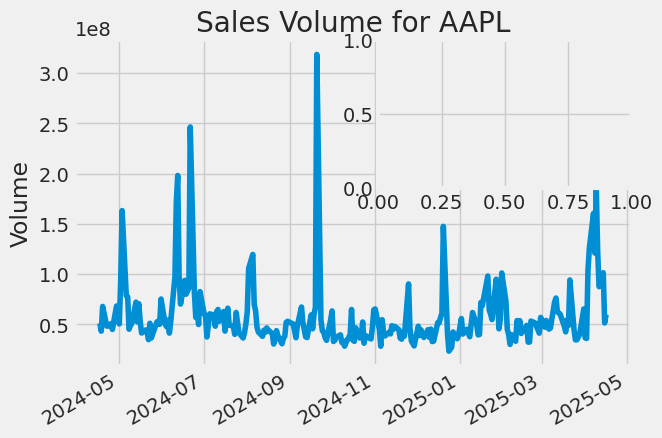

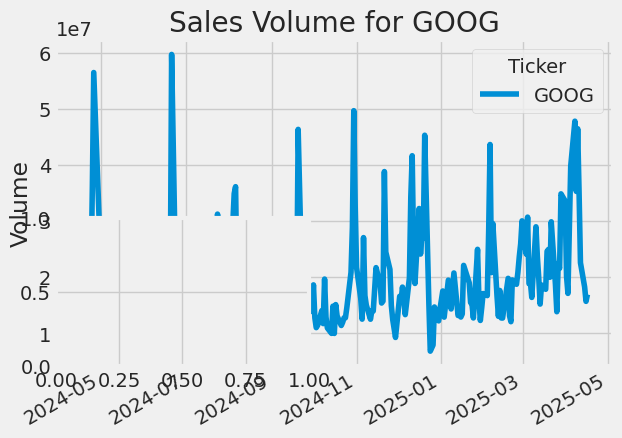

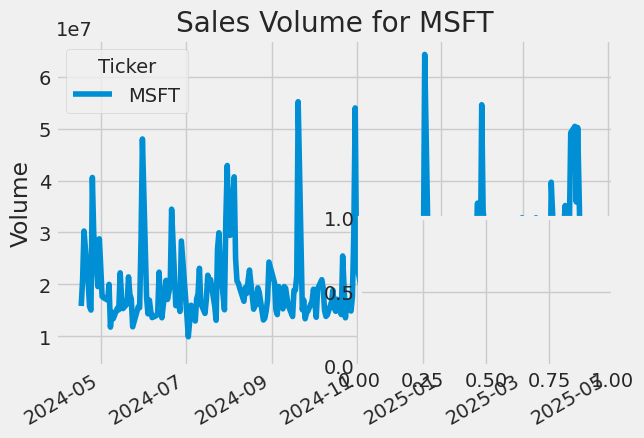

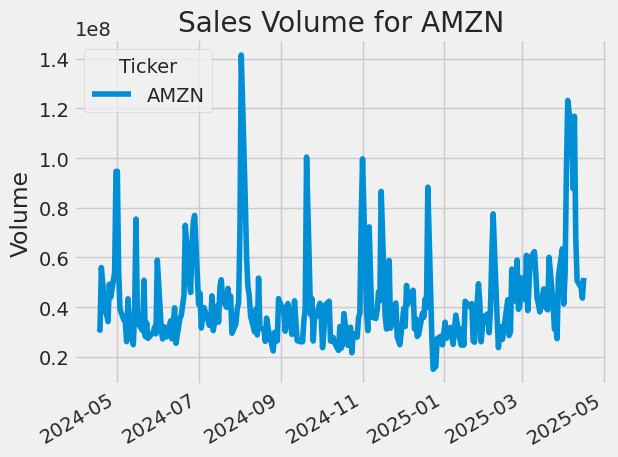

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

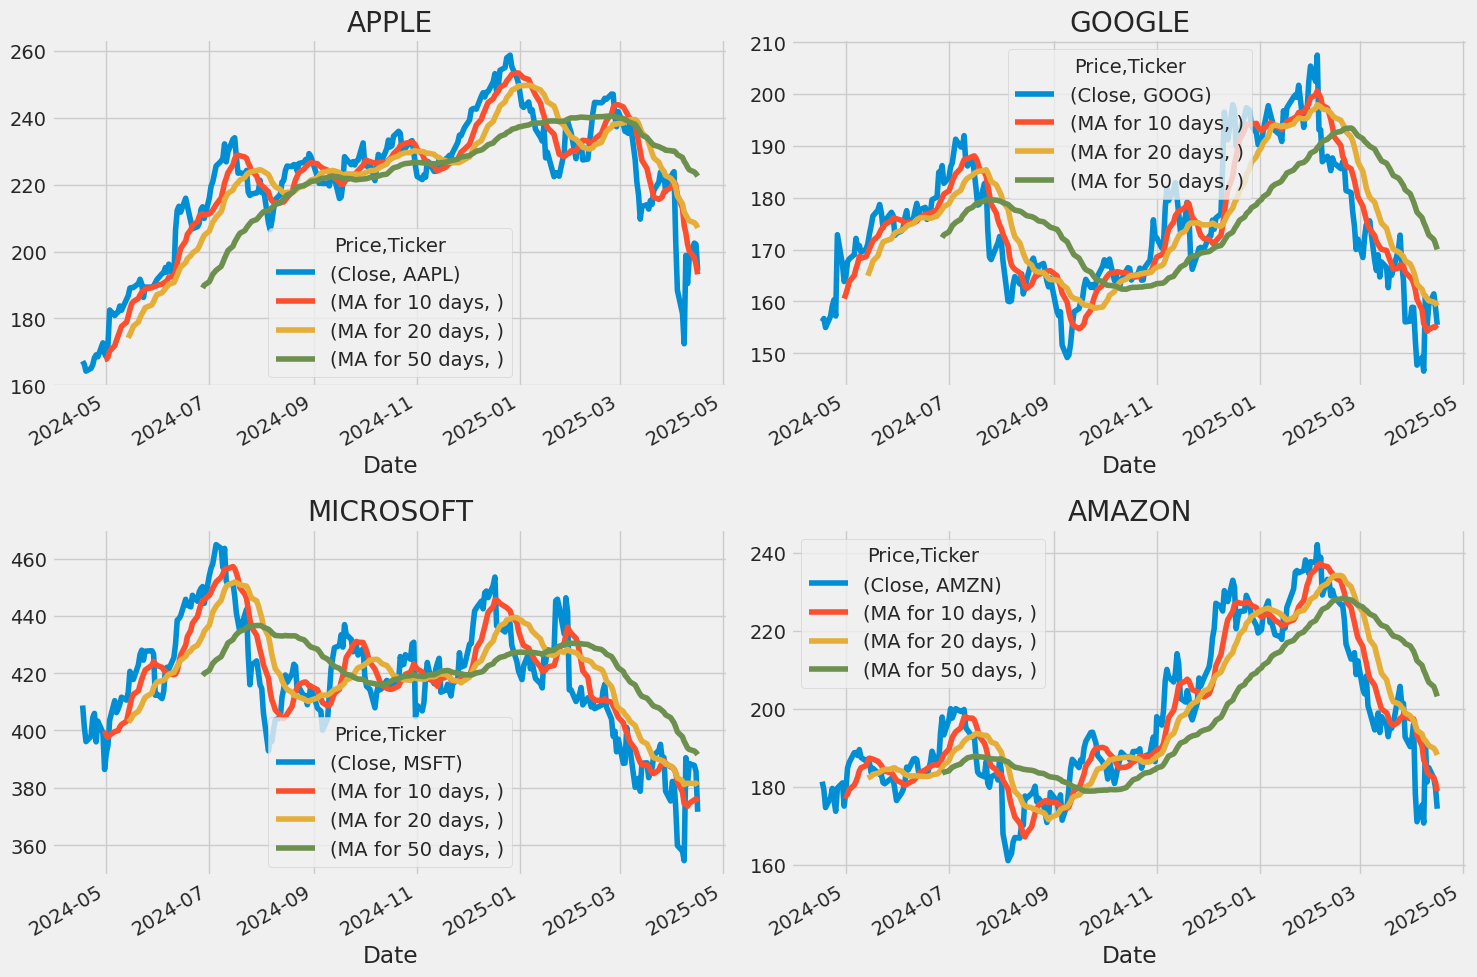

In [7]:
ma_day = [10, 20, 50]

# Calculate moving averages using 'Close'
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()


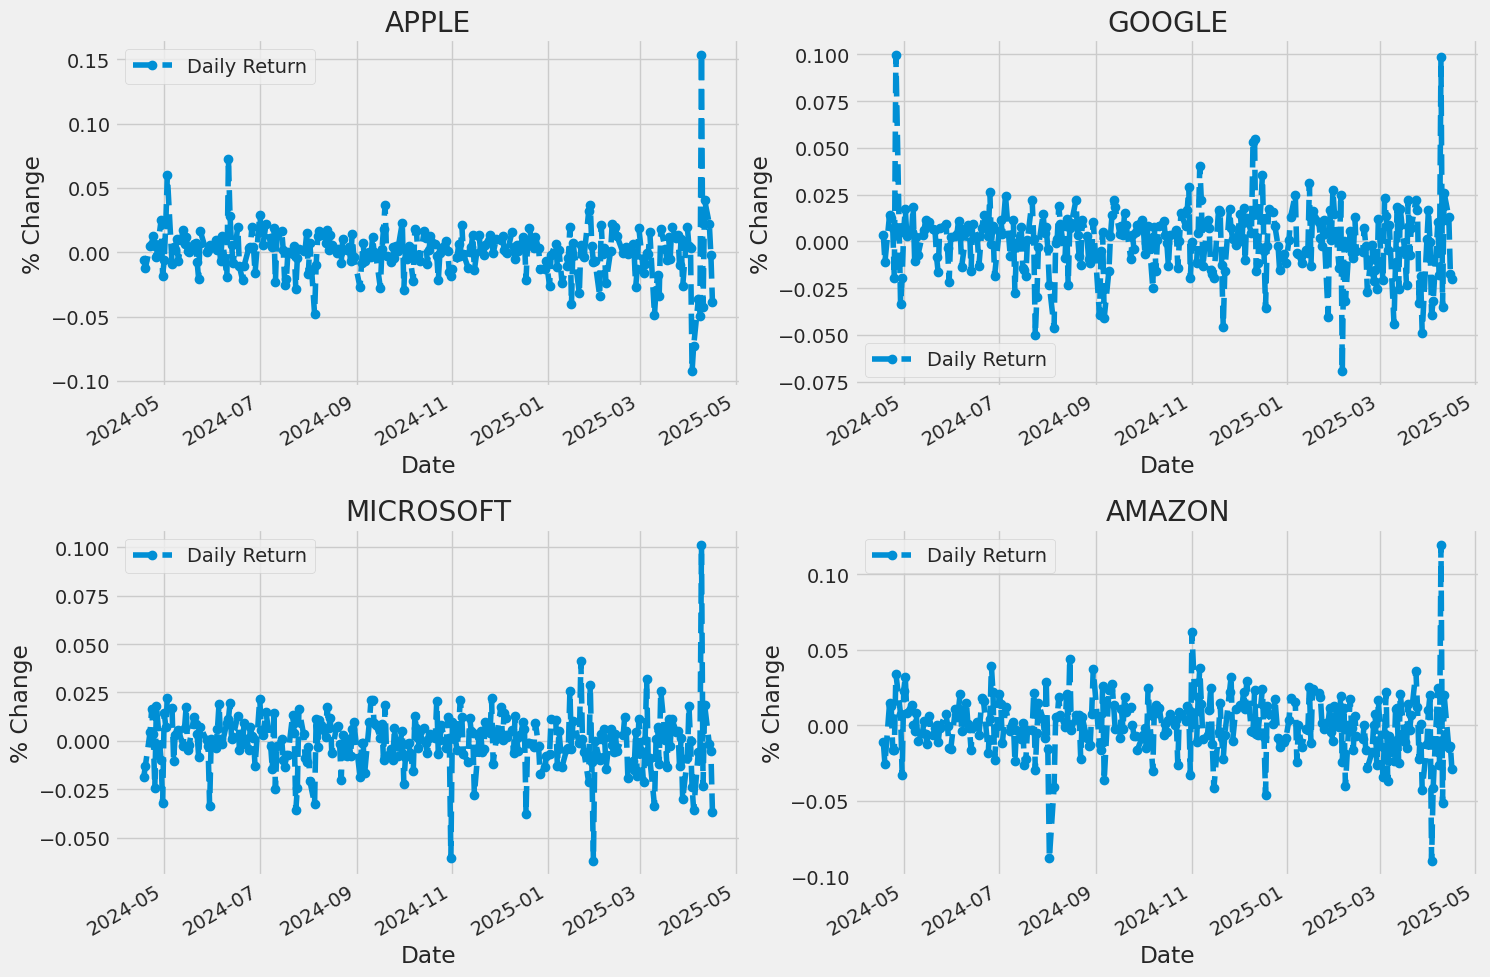

In [8]:
# Calculate daily returns using 'Close'
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Plot daily returns
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
axes[0,0].set_ylabel('% Change')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
axes[0,1].set_ylabel('% Change')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
axes[1,0].set_ylabel('% Change')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')
axes[1,1].set_ylabel('% Change')

fig.tight_layout()
plt.show()


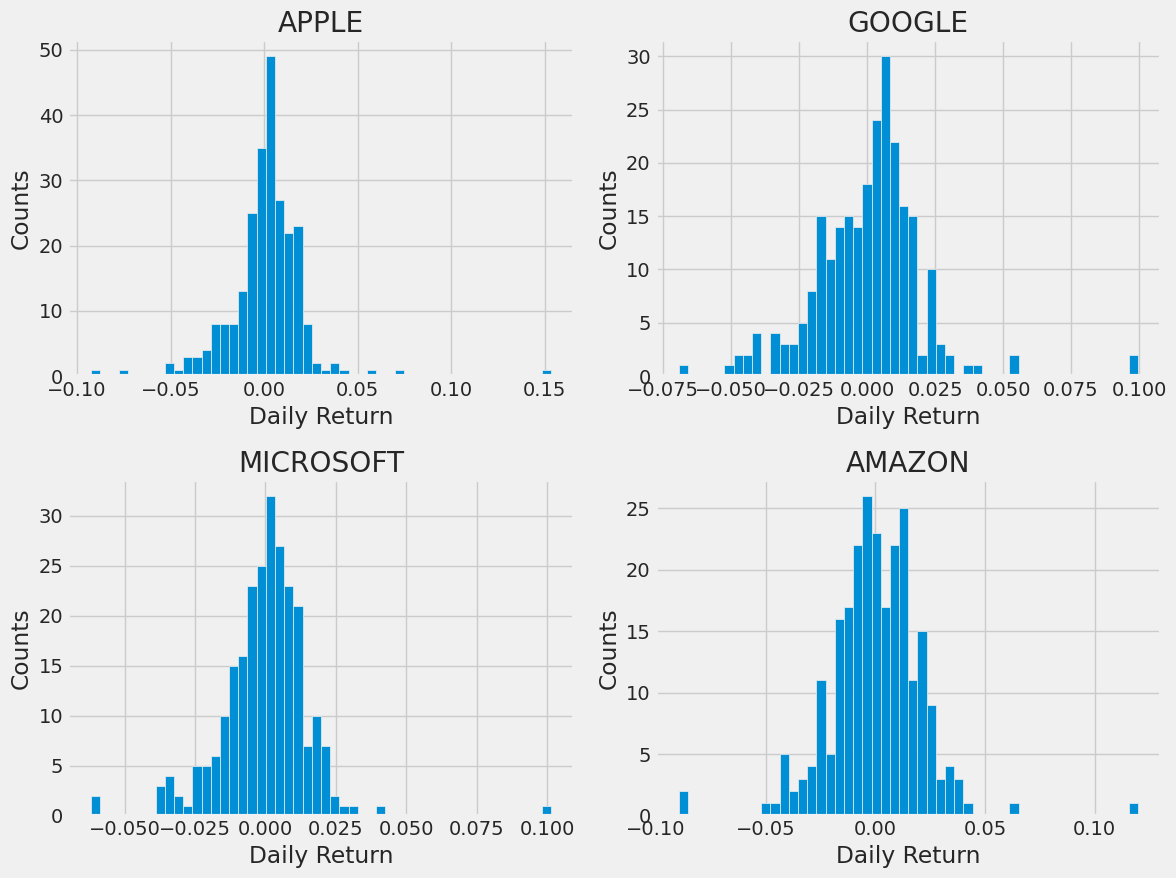

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [10]:
import yfinance as yf

# Download closing prices only for tech_list
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Calculate percentage returns
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-04-17,NaN,NaN,NaN,NaN
2024-04-18,-0.005714,-0.011364,0.003697,-0.018381
2024-04-19,-0.012213,-0.025611,-0.011050,-0.012739
2024-04-22,0.005091,0.014889,0.014321,0.004610
2024-04-23,0.006392,0.013034,0.012472,0.016485


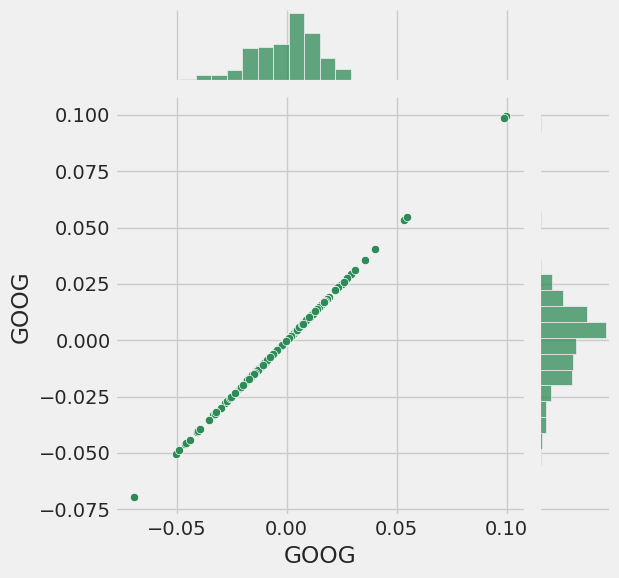

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

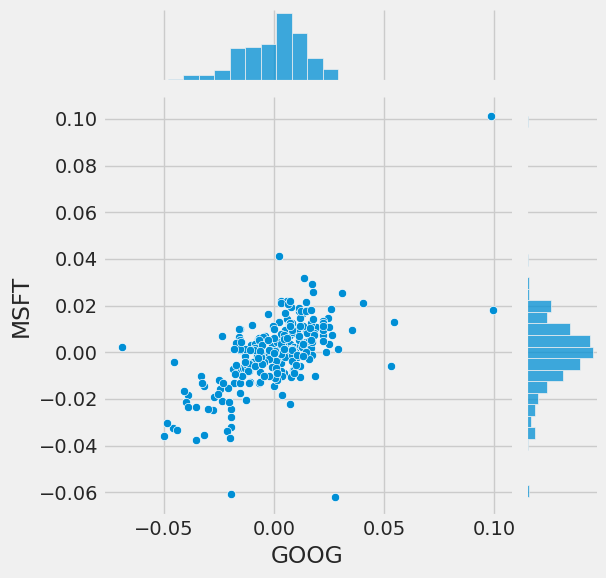

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

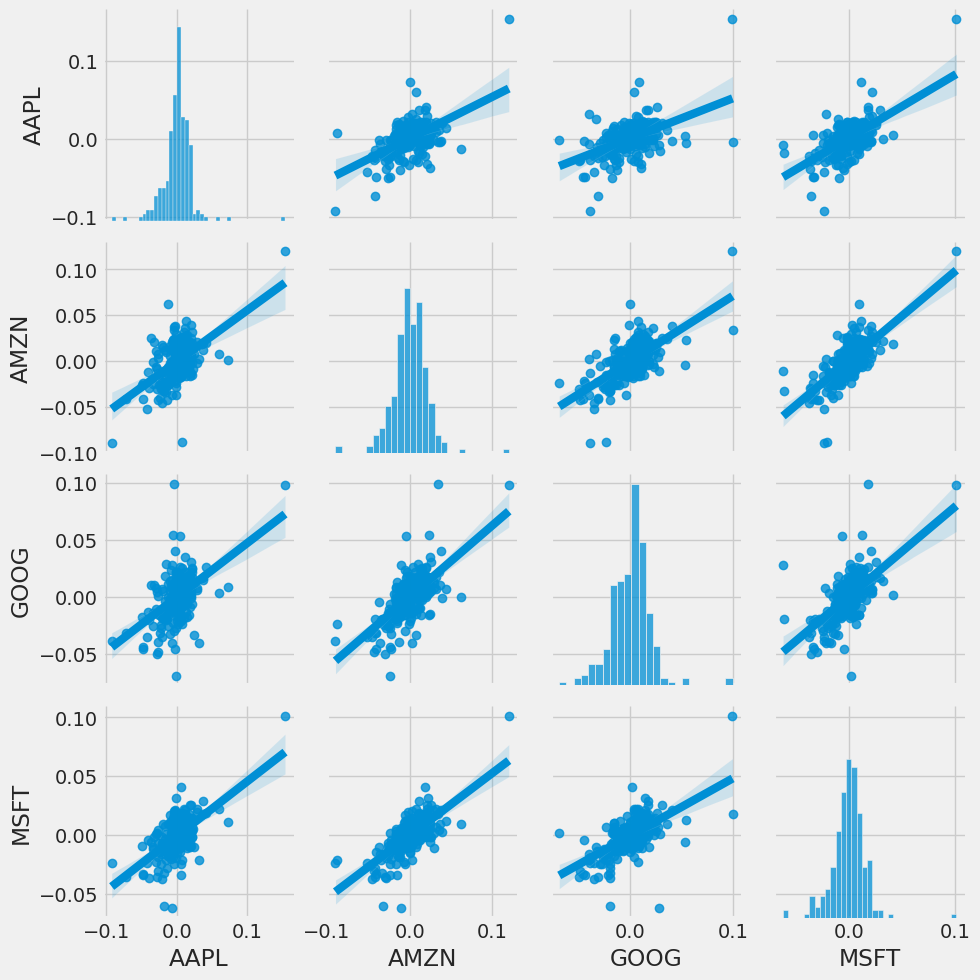

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

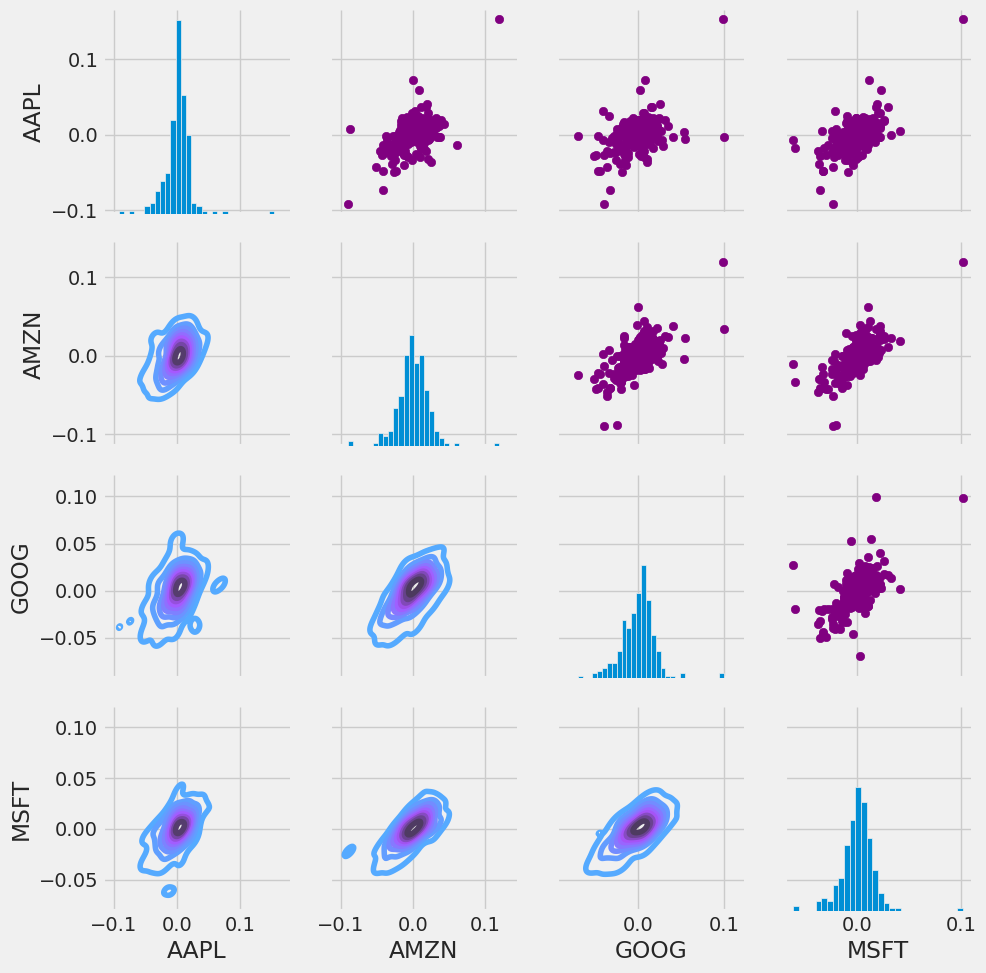

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

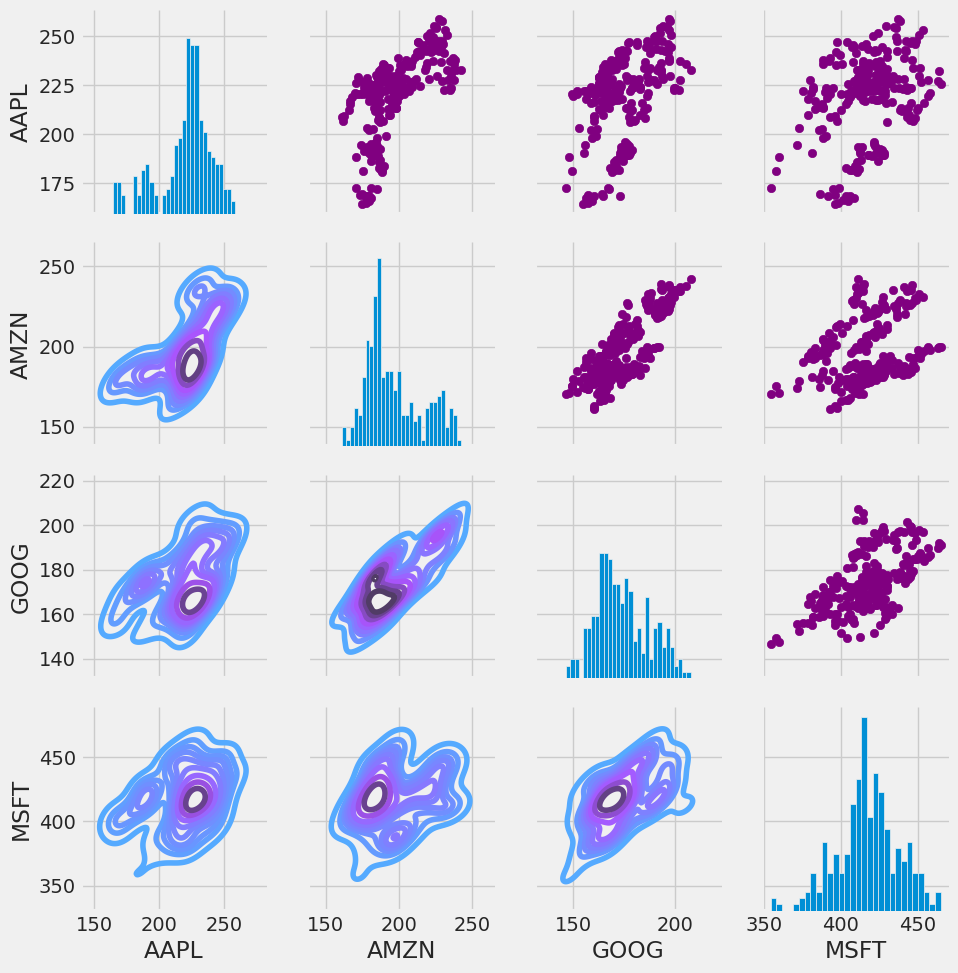

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

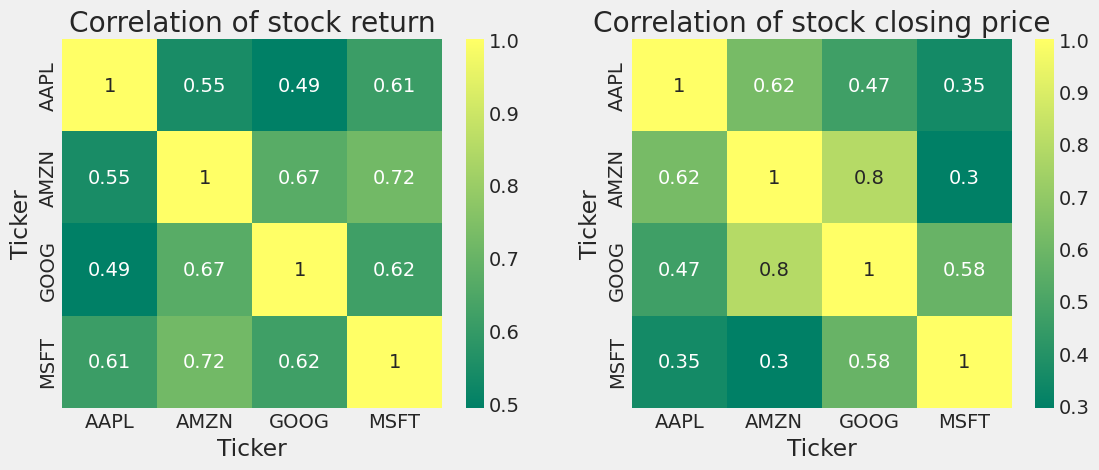

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

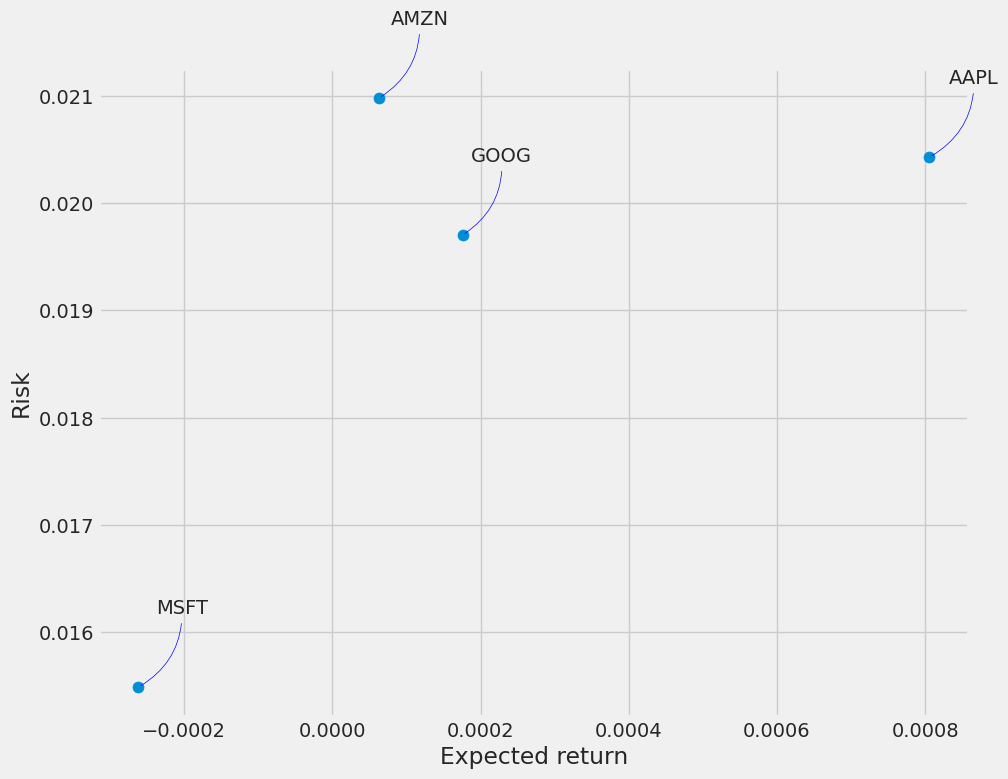

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [18]:
import yfinance as yf
from datetime import datetime

# Get stock quote using yfinance
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Show the data
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.375390,12.413609,12.308282,12.320320,302220800
2012-01-04,12.441895,12.479212,12.316706,12.338374,260022000
2012-01-05,12.580025,12.595673,12.418723,12.487337,271269600
2012-01-06,12.711536,12.722069,12.615839,12.632390,318292800
2012-01-09,12.691373,12.872536,12.679937,12.804826,394024400


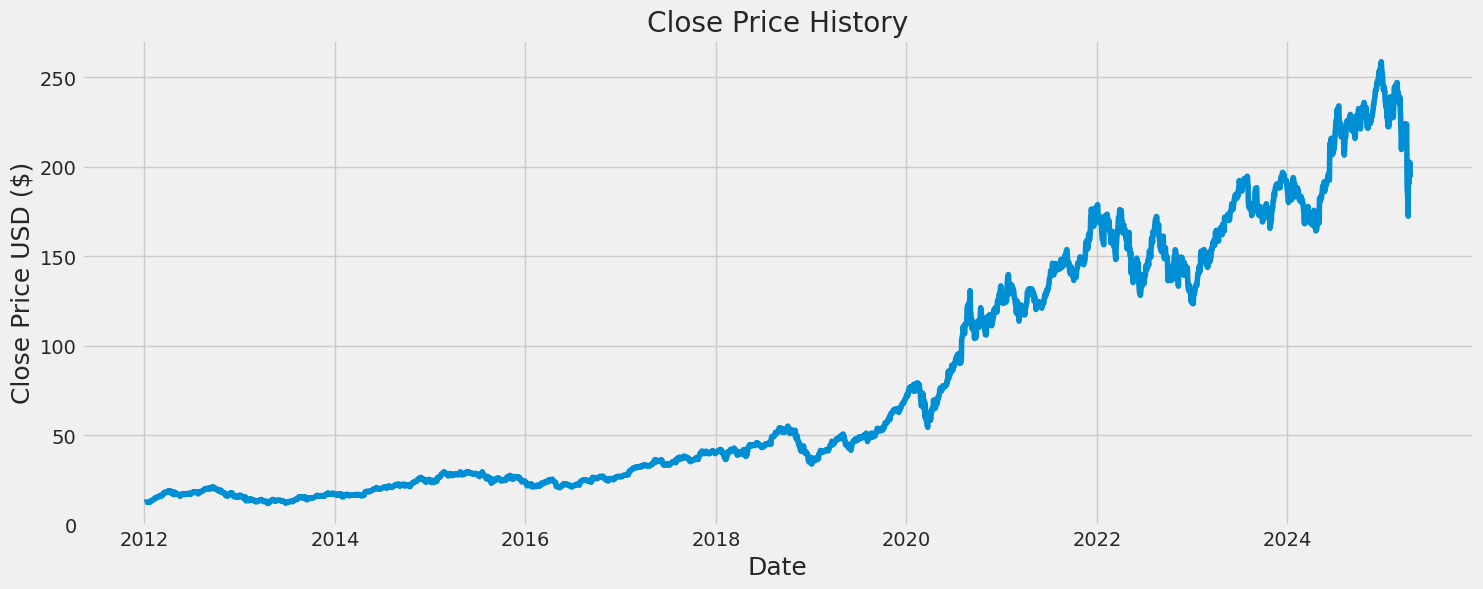

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3175

In [21]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Use 'Close' price only
dataset = df[['Close']]

# Scale it
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Check the result
print(scaled_data[:5])


[*********************100%***********************]  1 of 1 completed

[[0.00182109]
 [0.00209057]
 [0.00265022]
 [0.00318307]
 [0.00310137]]


In [22]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00182109, 0.00209057, 0.00265022, 0.00318307, 0.00310137,
       0.00328549, 0.00320136, 0.00305991, 0.00286726, 0.0034635 ,
       0.00400122, 0.00383539, 0.00292699, 0.00379394, 0.00294043,
       0.00614109, 0.00589358, 0.00621669, 0.00691535, 0.00733846,
       0.00730309, 0.00717264, 0.00772862, 0.00825171, 0.0088443 ,
       0.00980144, 0.01181208, 0.01184256, 0.01296186, 0.01379834,
       0.01236077, 0.01291433, 0.01290334, 0.01445552, 0.01423485,
       0.01464331, 0.0153773 , 0.01578578, 0.01696244, 0.0178196 ,
       0.01806714, 0.01815373, 0.01668807, 0.01633446, 0.01638694,
       0.01776472, 0.01815247, 0.01898527, 0.02094834, 0.0235674 ,
       0.02307721, 0.02307845, 0.02497201, 0.02556462, 0.02514274,
       0.02475745, 0.02435629, 0.02568899, 0.02660349, 0.02698631])]
[np.float64(0.0260401369016674)]

[array([0.00182109, 0.00209057, 0.00265022, 0.00318307, 0.00310137,
       0.00328549, 0.00320136, 0.00305991, 0.00286726, 0.0034635 ,
       0.00400122, 0.003

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3115/3115 ━━━━━━━━━━━━━━━━━━━━ 164s 52ms/step - loss: 0.0025


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [24]:
# Assuming this is already done:
# dataset = df[['Close']]
# scaled_data = scaler.fit_transform(dataset)
# training_data_len = int(len(dataset) * 0.8)

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict
predictions = model.predict(x_test)

# Invert scaling
predictions = scaler.inverse_transform(predictions)

# Correct y_test
y_test = dataset.values[training_data_len:, :]

# RMSE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("RMSE:", rmse)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
RMSE: 21.787208642372942


In [25]:
print(data.columns)


MultiIndex([], names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


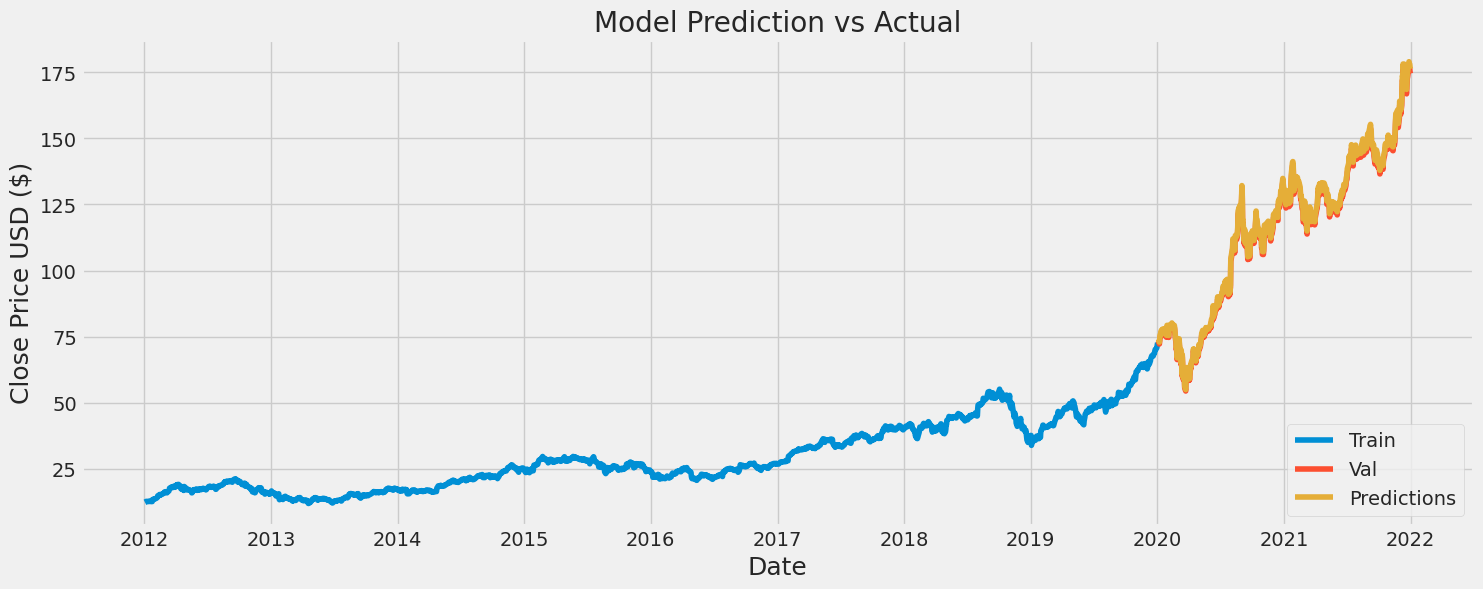

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download the data from Yahoo Finance
data = yf.download('AAPL', start='2012-01-01', end='2022-01-01')

# Optional: check the column names (especially to confirm 'Close' exists)
print(data.columns)

# Step 2: Prepare the data
# Choose the correct close column — either 'Close' or 'Adj Close'
close_col = 'Close'

# Define your training data length (adjust this to your actual logic)
training_data_len = int(len(data) * 0.8)

# Split the data
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()

# Example dummy predictions — replace this with your model's output
# It should be the same length as `valid`
predictions = valid[close_col] * 1.01  # Example: just 1% higher as dummy prediction

# Step 3: Assign predictions safely
valid.loc[:, 'Predictions'] = predictions

# Step 4: Plot the results
plt.figure(figsize=(16,6))
plt.title('Model Prediction vs Actual')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[close_col], label='Train')
plt.plot(valid[close_col], label='Val')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend(loc='lower right')
plt.show()


In [27]:
# Show the valid and predicted prices
valid

Price,Close,High,Low,Open,Volume,Predictions
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800,72.729224
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,73.308745
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000,72.963970
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200,74.137669
2020-01-09,74.962807,75.156487,74.132390,74.384173,170108400,75.712435
...,...,...,...,...,...,...
2021-12-27,177.228836,177.317285,174.024904,174.044549,74919600,179.001124
2021-12-28,176.206696,178.211622,175.459771,177.061744,79144300,177.968763


In [34]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Get user input
ticker = input("Enter Stock Ticker (e.g., AAPL): ").upper()
df = yf.download(ticker, period="60d", interval="1d")

# Preprocessing
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare input for prediction (e.g., last 60 days)
sequence = scaled_data[-60:]
X_input = np.array(sequence).reshape(1, 60, 1)

# Predict
predicted_price = model.predict(X_input)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted price for {ticker} is ${predicted_price[0][0]:.2f}")


Enter Stock Ticker (e.g., AAPL): AMZN


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted price for AMZN is $179.53
